# Complex FeedForward network

In [1]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import tanh

def apply_complex(fr, fi, input, dtype=torch.complex64):
    """Applies a complex linear transformation."""
    return (fr(input.real) - fi(input.imag)).type(dtype) + 1j * (fr(input.imag) + fi(input.real)).type(dtype)

class ComplexTanh(Module):
    @staticmethod
    def forward(inp):
        return tanh(inp.real).type(torch.complex64) + 1j * tanh(inp.imag).type(torch.complex64)

class ComplexLinear(Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc_r = Linear(in_features, out_features)
        self.fc_i = Linear(in_features, out_features)

    def forward(self, inp):
        return apply_complex(self.fc_r, self.fc_i, inp)

class ComplexFeedForwardNetwork(Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()
        self.layer1 = ComplexLinear(in_features, hidden_features)
        self.activation = ComplexTanh()
        self.layer2 = ComplexLinear(hidden_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x


# Initialize model
model = ComplexFeedForwardNetwork(1, 32, 1)

ComplexFeedForwardNetwork(
  (layer1): ComplexLinear(
    (fc_r): Linear(in_features=1, out_features=10, bias=True)
    (fc_i): Linear(in_features=1, out_features=10, bias=True)
  )
  (activation): ComplexTanh()
  (layer2): ComplexLinear(
    (fc_r): Linear(in_features=10, out_features=1, bias=True)
    (fc_i): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [1000/100000], Loss: 5.4792
Epoch [2000/100000], Loss: 1.9152
Epoch [3000/100000], Loss: 1.1709
Epoch [4000/100000], Loss: 0.8298
Epoch [5000/100000], Loss: 0.6260
Epoch [6000/100000], Loss: 0.4857
Epoch [7000/100000], Loss: 0.2653
Epoch [8000/100000], Loss: 0.1642
Epoch [9000/100000], Loss: 0.1159
Epoch [10000/100000], Loss: 0.0883
Epoch [11000/100000], Loss: 0.0779
Epoch [12000/100000], Loss: 0.0764
Epoch [13000/100000], Loss: 0.0499
Epoch [14000/100000], Loss: 0.0692
Epoch [15000/100000], Loss: 0.0397
Epoch [16000/100000], Loss: 0.0367
Epoch [17000/100000], Loss: 0.0721
Epoch [18000/100000], Loss: 0.1104
Epoch [190

In [2]:
def print_model_parameters(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.data)

print_model_parameters(model)


layer1.fc_r.weight tensor([[ 0.5618],
        [ 0.4602],
        [ 0.4337],
        [-0.1353],
        [ 0.4681],
        [ 0.3904],
        [-0.4900],
        [ 0.4076],
        [-0.5264],
        [ 0.6649]])
layer1.fc_r.bias tensor([ 0.3786, -2.0002, -1.7703,  0.4886, -4.9101, -3.5056,  2.3811,  2.2475,
         3.3056,  2.9604])
layer1.fc_i.weight tensor([[-0.3411],
        [ 0.0063],
        [-0.4007],
        [ 0.2888],
        [ 0.4348],
        [-0.4308],
        [ 0.0105],
        [ 0.4247],
        [ 0.0057],
        [-0.5968]])
layer1.fc_i.bias tensor([-3.6614,  0.4994,  3.0504, -2.2554, -7.4193,  1.2369,  0.8580,  1.0822,
        -0.2276,  0.4395])
layer2.fc_r.weight tensor([[ -3.5900,   9.6485,  10.2660,  -4.3474,  -5.3650, -11.6410,  -6.9623,
           0.1453,  -9.8020,  11.9301]])
layer2.fc_r.bias tensor([2.3640])
layer2.fc_i.weight tensor([[  4.8262,  10.0976,  -2.1232, -12.2914,   6.0883,   0.6939,  -7.2127,
           7.8106, -12.6065,  -2.0035]])
layer2.fc_i.bias ten

Epoch [1000/100000], Loss: 5.3587
Epoch [2000/100000], Loss: 2.0865
Epoch [3000/100000], Loss: 1.3091
Epoch [4000/100000], Loss: 0.7653
Epoch [5000/100000], Loss: 0.4112
Epoch [6000/100000], Loss: 0.2681
Epoch [7000/100000], Loss: 0.1959
Epoch [8000/100000], Loss: 0.1862
Epoch [9000/100000], Loss: 0.1729
Epoch [10000/100000], Loss: 0.0880
Epoch [11000/100000], Loss: 0.0706
Epoch [12000/100000], Loss: 0.0627
Epoch [13000/100000], Loss: 0.0500
Epoch [14000/100000], Loss: 0.0437
Epoch [15000/100000], Loss: 0.0409
Epoch [16000/100000], Loss: 0.0477
Epoch [17000/100000], Loss: 0.0326
Epoch [18000/100000], Loss: 0.0599
Epoch [19000/100000], Loss: 0.0281
Epoch [20000/100000], Loss: 0.0265
Epoch [21000/100000], Loss: 0.0251
Epoch [22000/100000], Loss: 0.0238
Epoch [23000/100000], Loss: 0.0228
Epoch [24000/100000], Loss: 0.0231
Epoch [25000/100000], Loss: 0.0211
Epoch [26000/100000], Loss: 0.0204
Epoch [27000/100000], Loss: 0.0196
Epoch [28000/100000], Loss: 0.0191
Epoch [29000/100000], Loss: 0

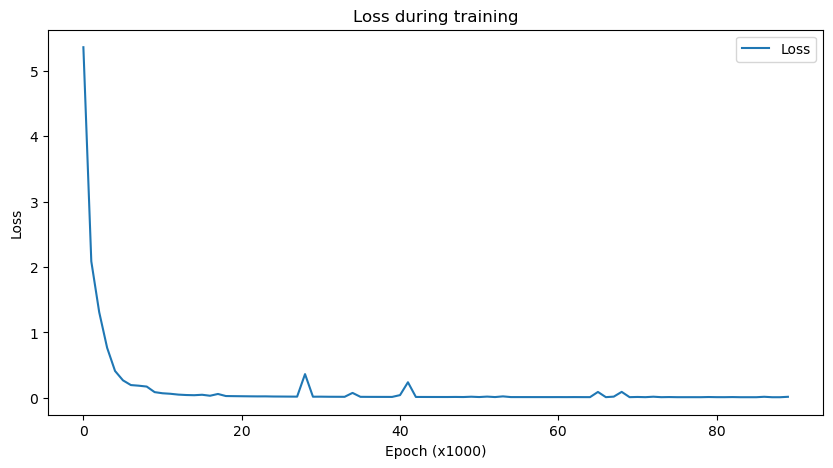

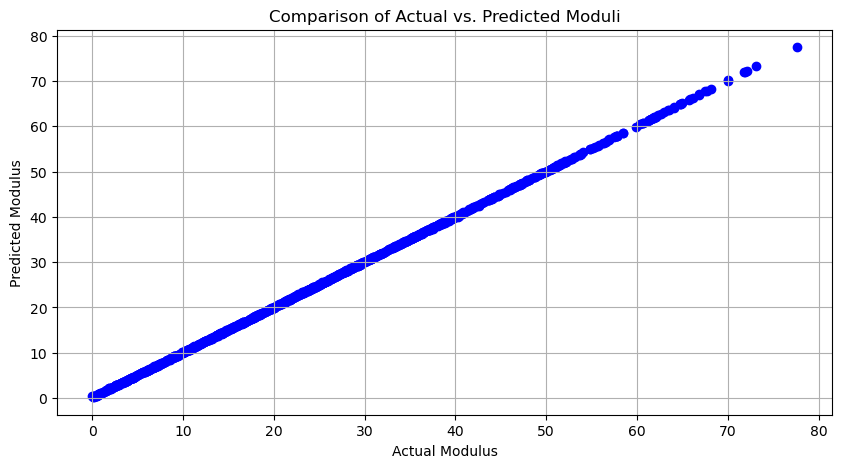

In [6]:
import matplotlib.pyplot as plt
import torch
from torch.nn import Module, Linear
from torch.nn.functional import tanh

def apply_complex(fr, fi, input, dtype=torch.complex64):
    """Applies a complex linear transformation."""
    return (fr(input.real) - fi(input.imag)).type(dtype) + 1j * (fr(input.imag) + fi(input.real)).type(dtype)

class ComplexTanh(Module):
    @staticmethod
    def forward(inp):
        return tanh(inp.real).type(torch.complex64) + 1j * tanh(inp.imag).type(torch.complex64)

class ComplexLinear(Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc_r = Linear(in_features, out_features)
        self.fc_i = Linear(in_features, out_features)

    def forward(self, inp):
        return apply_complex(self.fc_r, self.fc_i, inp)

class ComplexFeedForwardNetwork(Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()
        self.layer1 = ComplexLinear(in_features, hidden_features)
        self.activation = ComplexTanh()
        self.layer2 = ComplexLinear(hidden_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

# Generate dataset
n_samples = 1000
RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10000 and 1x10)
z = torch.complex(x, y)
target_z = z**2  # Quadratic function f(z) = z^2

# Initialize model
model = ComplexFeedForwardNetwork(1, 10, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define loss function
def complex_mse_loss(output, target):
    return torch.mean((output.real - target.real) ** 2 + (output.imag - target.imag) ** 2)

# Training loop
epochs = 100000
losses = []
moduli_pred = []
moduli_actual = []

for epoch in range(epochs):
    prediction = model(z)
    loss = complex_mse_loss(prediction, target_z)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        moduli_pred.append(torch.abs(prediction).detach().numpy())
        moduli_actual.append(torch.abs(target_z).detach().numpy())
        losses.append(loss.item())
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
    
    if loss.item() < 1e-2:
        break

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Loss during training')
plt.xlabel('Epoch (x1000)')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(moduli_actual[-1], moduli_pred[-1], c='blue')
plt.title('Comparison of Actual vs. Predicted Moduli')
plt.xlabel('Actual Modulus')
plt.ylabel('Predicted Modulus')
plt.grid(True)
plt.show()


# edit after the above

In [13]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import tanh

def apply_complex(fr, fi, input, dtype=torch.complex64):
    """Applies a complex linear transformation."""
    return (fr(input.real) - fi(input.imag)).type(dtype) + 1j * (fr(input.imag) + fi(input.real)).type(dtype)

class ComplexTanh(Module):
    @staticmethod
    def forward(inp):
        return tanh(inp.real).type(torch.complex64) + 1j * tanh(inp.imag).type(torch.complex64)

class ComplexLinear(Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc_r = Linear(in_features, out_features)
        self.fc_i = Linear(in_features, out_features)

    def forward(self, inp):
        return apply_complex(self.fc_r, self.fc_i, inp)

class ComplexFeedForwardNetwork(Module):
    def __init__(self, in_features, hidden_features1, hidden_features2, hidden_features3, out_features):
        super().__init__()
        self.layer1 = ComplexLinear(in_features, hidden_features1)
        self.layer2 = ComplexLinear(hidden_features1, hidden_features2)
        self.layer3 = ComplexLinear(hidden_features2, hidden_features3)
        self.activation = ComplexTanh()
        self.layer4 = ComplexLinear(hidden_features3, out_features)

    def forward(self, x, t):
        # Convert the two scalar inputs into a complex number input
        combined_input = torch.tensor([x + 1j * t], dtype=torch.complex64)
        x = self.layer1(combined_input)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.layer3(x)
        x = self.activation(x)
        x = self.layer4(x)
        return x

# Initialize the model with the specified layers and neurons
model = ComplexFeedForwardNetwork(1, 16, 32, 16, 1)
print(model)
# Example scalar inputs for x and t
x_scalar = 3.0
t_scalar = 4.0
output = model(x_scalar, t_scalar)

print("Output for Input x=3.0 and t=4.0:", output)


ComplexFeedForwardNetwork(
  (layer1): ComplexLinear(
    (fc_r): Linear(in_features=1, out_features=16, bias=True)
    (fc_i): Linear(in_features=1, out_features=16, bias=True)
  )
  (layer2): ComplexLinear(
    (fc_r): Linear(in_features=16, out_features=32, bias=True)
    (fc_i): Linear(in_features=16, out_features=32, bias=True)
  )
  (layer3): ComplexLinear(
    (fc_r): Linear(in_features=32, out_features=64, bias=True)
    (fc_i): Linear(in_features=32, out_features=64, bias=True)
  )
  (activation): ComplexTanh()
  (layer4): ComplexLinear(
    (fc_r): Linear(in_features=64, out_features=1, bias=True)
    (fc_i): Linear(in_features=64, out_features=1, bias=True)
  )
)
Output for Input x=3.0 and t=4.0: tensor([-0.6848+0.0844j], grad_fn=<AddBackward0>)
